In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)

data = {
    "Math_Score": np.random.randint(60, 95, 100),
    "Reading_Score": np.random.randint(70, 95, 100),
    "Writing_Score": np.random.randint(60, 90, 100),
    "Placement_Score": np.random.randint(75, 100, 100),
    "Club_Join_Date": np.random.randint(2018, 2022, 100),
    "Placement_Offer_Count": np.random.randint(0, 4, 100)
}

df = pd.DataFrame(data)
df.head()
import os

# Create Data directory if it doesn't exist
os.makedirs("Data", exist_ok=True)

# Save the file
df.to_csv("Data/StudentsPerformance.csv", index=False)

print("File saved successfully!")


File saved successfully!


In [20]:
df.loc[5, 'Math_Score'] = np.nan
df.loc[12, 'Reading_Score'] = np.nan
df.loc[20, 'Writing_Score'] = np.nan
df.loc[33, 'Placement_Score'] = np.nan

In [21]:
df.isnull().sum()


Math_Score               1
Reading_Score            1
Writing_Score            1
Placement_Score          1
Club_Join_Date           0
Placement_Offer_Count    0
dtype: int64

In [22]:
df[df.isnull().any(axis=1)]

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
5,NaN,72.0,80.0,85.0,2020,0
12,87.0,NaN,63.0,99.0,2020,3
20,87.0,87.0,NaN,80.0,2021,0
33,87.0,76.0,60.0,NaN,2020,0


In [23]:
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Reading_Score'] = df['Reading_Score'].fillna(df['Reading_Score'].median())
df['Writing_Score'] = df['Writing_Score'].fillna(df['Writing_Score'].mode()[0])
df.dropna(inplace=True)


In [24]:
df['Right_Skewed'] = np.random.exponential(scale=10, size=len(df))

df['Log_Transformed'] = np.log1p(df['Right_Skewed'])
for col in ['Math_Score','Reading_Score',
            'Writing_Score','Placement_Score']:
    
    print(col)
    print("Skewness:", df[col].skew())
    print("-----------")


Math_Score
Skewness: -0.03832037032972204
-----------
Reading_Score
Skewness: 0.1514084442300056
-----------
Writing_Score
Skewness: 0.07902685458941358
-----------
Placement_Score
Skewness: -0.5712122104881153
-----------


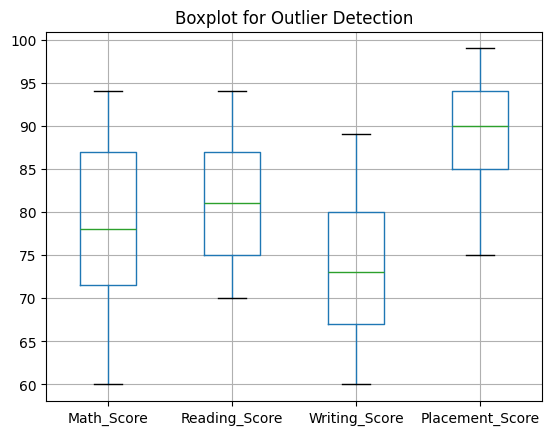

In [25]:

col = ['Math_Score','Reading_Score','Writing_Score','Placement_Score']

df.boxplot(col)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [26]:
print("Math Score Outliers:")
print(np.where(df['Math_Score'] > 90))

print("Reading Score Outliers:")
print(np.where(df['Reading_Score'] > 92))

print("Writing Score Outliers:")
print(np.where(df['Writing_Score'] > 85))

Math Score Outliers:
(array([18, 23, 26, 36, 41, 46, 55, 65, 69, 88, 95]),)
Reading Score Outliers:
(array([ 0,  2, 50, 77, 86, 89, 90, 94]),)
Writing Score Outliers:
(array([ 1, 13, 28, 45, 53, 57, 60, 64, 93]),)


In [27]:
cols = ['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score']

for col in cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + '_MM'] = (df[col] - min_val) / (max_val - min_val)

df.head()


,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Right_Skewed,Log_Transformed,Math_Score_MM,Reading_Score_MM,Writing_Score_MM,Placement_Score_MM
0,72.0,94.0,65.0,92.0,2020,3,14.408126,2.734895,0.352941,1.000000,0.172414,0.708333
1,83.0,76.0,87.0,79.0,2021,3,13.712493,2.688697,0.676471,0.250000,0.931034,0.166667
2,62.0,93.0,67.0,92.0,2021,2,12.034671,2.567613,0.058824,0.958333,0.241379,0.708333
3,77.0,86.0,72.0,94.0,2021,2,14.842687,2.762708,0.500000,0.666667,0.413793,0.791667
4,63.0,70.0,67.0,98.0,2019,0,4.799500,1.757772,0.088235,0.000000,0.241379,0.958333


In [28]:
cols = ['Math_Score', 'Reading_Score', 
        'Writing_Score', 'Placement_Score']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

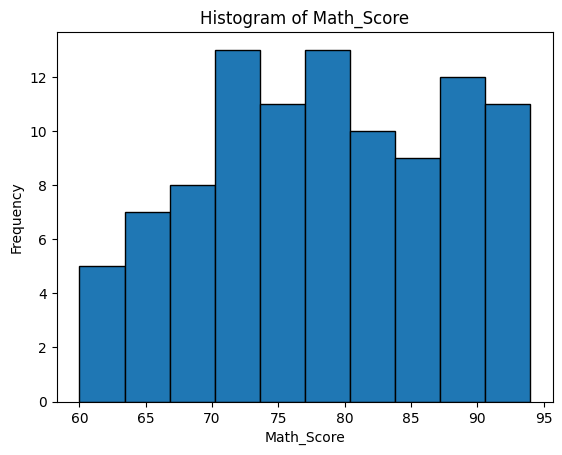

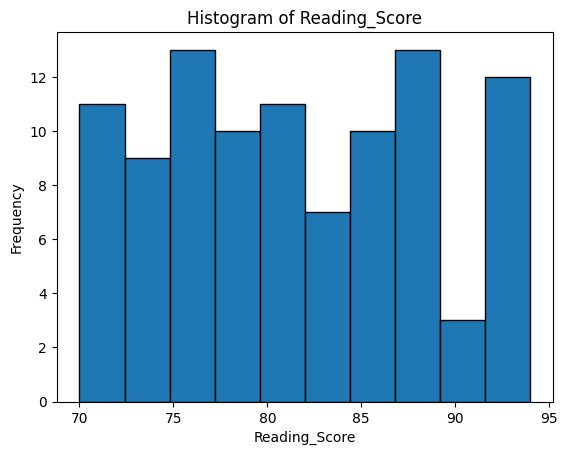

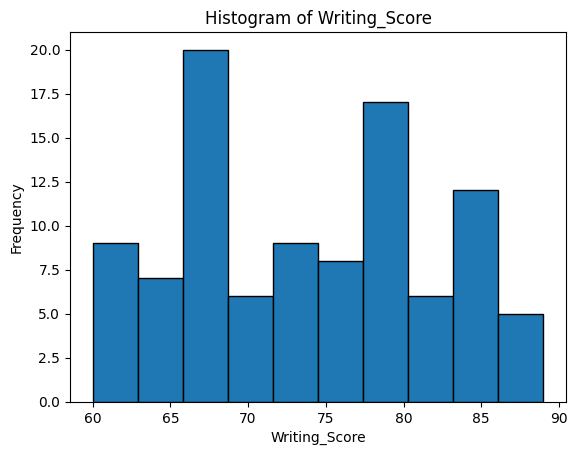

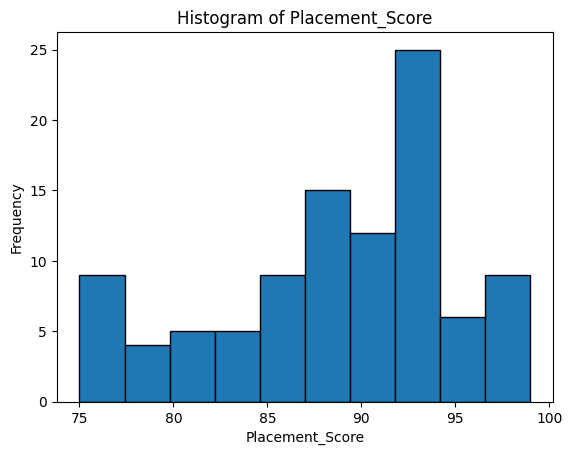

In [29]:
cols = ['Math_Score', 'Reading_Score', 
        'Writing_Score', 'Placement_Score']
for col in cols:
    plt.figure()
    plt.hist(df[col], bins=10, edgecolor='black', linewidth=1)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

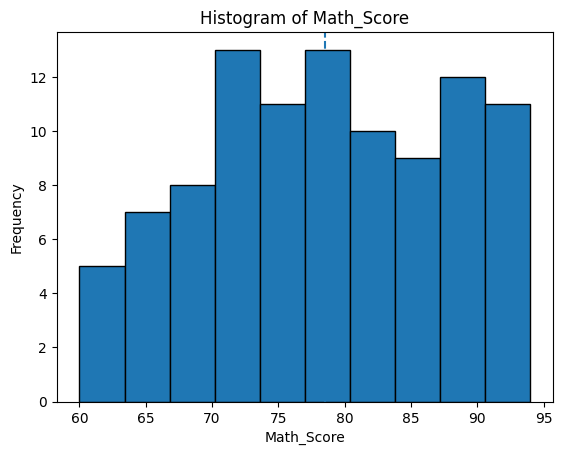

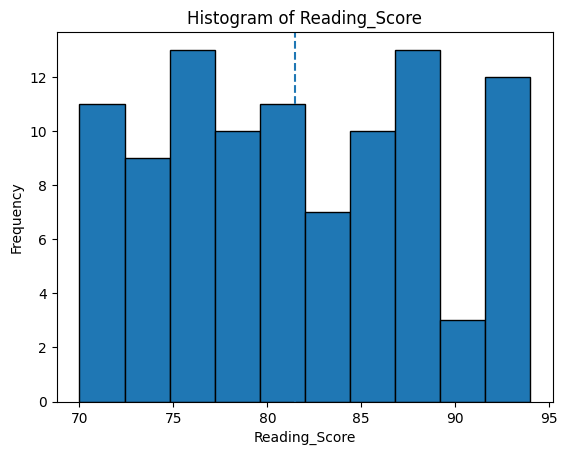

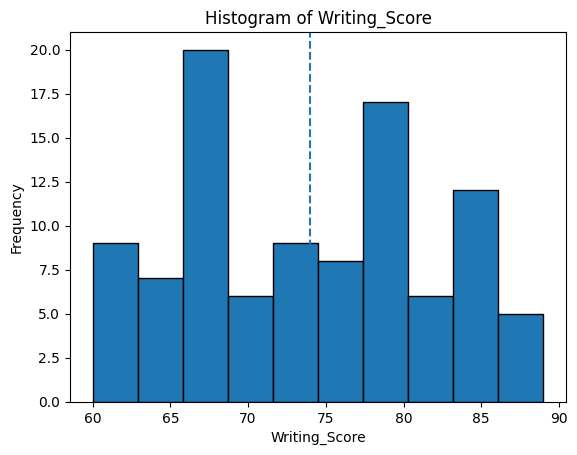

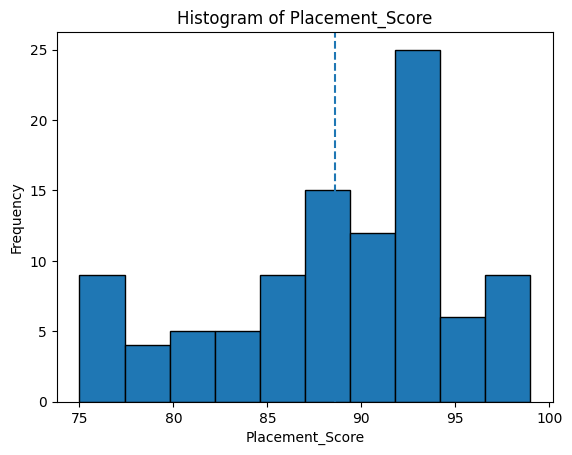

In [30]:
cols = ['Math_Score', 'Reading_Score', 
        'Writing_Score', 'Placement_Score']

for col in cols:
    plt.figure()
    
    plt.hist(df[col], bins=10, edgecolor='black')
    
    mean_val = df[col].mean()
    plt.axvline(mean_val, linestyle='--')
    
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    plt.show()

In [31]:
for col in ['Math_Score','Reading_Score',
            'Writing_Score','Placement_Score']:
    
    print(col)
    print("Skewness:", df[col].skew())
    print("-----------")


Math_Score
Skewness: -0.03832037032972204
-----------
Reading_Score
Skewness: 0.1514084442300056
-----------
Writing_Score
Skewness: 0.07902685458941358
-----------
Placement_Score
Skewness: -0.5712122104881153
-----------
